周囲のWi-Fiアクセスポイントを可視化する

In [93]:
import csv

# アクセスポイント群の情報を格納する
cites = []

# CSVファイルを開く（ファイルパスは適当に直す）
with open("wifi_info.txt", 'r') as file:
    # 各行を読み込む
    reader = csv.reader(file)
    for row in reader:
        cites.append(row)

cites = cites[1:]

In [94]:
print(cites[:5])

[['pr500k-2d6244-2', ' "12:66:82:F8:47:C8"', ' "-85"', ' "6"', ' "7:33:49"'], ['teststnet', ' "E4:1F:7B:E9:7C:8D"', ' "-92"', ' "116"', ' "7:33:49"'], ['', ' "E8:B4:70:40:04:97"', ' "-84"', ' "36"', ' "7:33:49"'], ['SA-AP_5G', ' "1C:3B:F3:C3:4B:26"', ' "-87"', ' "40"', ' "7:33:49"'], ['Shinkansen_Free_Wi-Fi', ' "4E:36:4E:0F:66:47"', ' "-91"', ' "11"', ' "7:33:49"']]


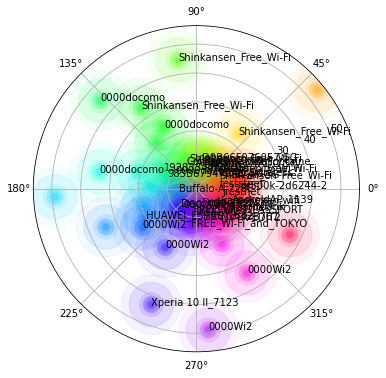

In [101]:
# 必要なモジュールを読み込む
import numpy as np
import math
import matplotlib.pyplot as plt

# 極座標の角度は、得られたデバイス情報の数を等分に割る
step = 2 * math.pi / (len(cites)+1)
rads = [ i * step for i in range(len(cites))]

# 極座標の「距離」は、信号強度（０に近いほど強い）
rs = [100.+float(cites[i][2].replace('"', '')) for i in range(len(cites))]

# 描く円の大きさは送信号強度を使う
area = rs

# アクセスポイントの識別子
labels = [ cites[i][0] for i in range(len(cites))]

# 極座標角度を「HSV色空間の色相」として、色表示する
colors = rads

# チャートを描く
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='polar')

# 各アクセスポイントの散布を描く
for i in range(20):
    ax.scatter(rads, rs, c = colors, 
               s = 1.5*area[i]*1.25**i, 
               cmap='hsv', alpha = 0.05)

# アクセスポイントの識別子も描く
for i in range(len(cites)):
    ax.text(rads[i], rs[i], labels[i])